In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [278]:
df=pd.read_csv("/content/sample_data/customers.csv")

In [279]:
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [280]:
import seaborn as sns

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [282]:
df.describe().round(2)

,CustomerID,Age,Income,SpendingScore
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60560.00,50.20
std,57.88,13.97,26264.72,25.82
min,1.00,18.00,15000.00,1.00
25%,50.75,28.75,41500.00,34.75
50%,100.50,36.00,61500.00,50.00
75%,150.25,49.00,78000.00,73.00
max,200.00,70.00,137000.00,99.00


<ipython-input-283-397c0c29cd0b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(data=df, x= "Gender", y ="Age",palette="colorblind")


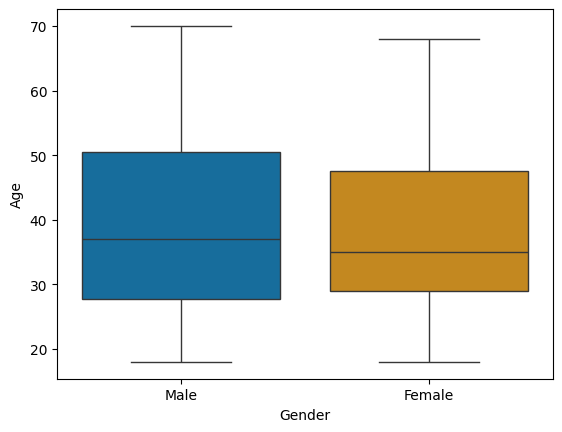

In [283]:
plot = sns.boxplot(data=df, x= "Gender", y ="Age",palette="colorblind")

<ipython-input-284-41fee657de94>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(data=df, x= "Gender", y ="SpendingScore",palette="colorblind")


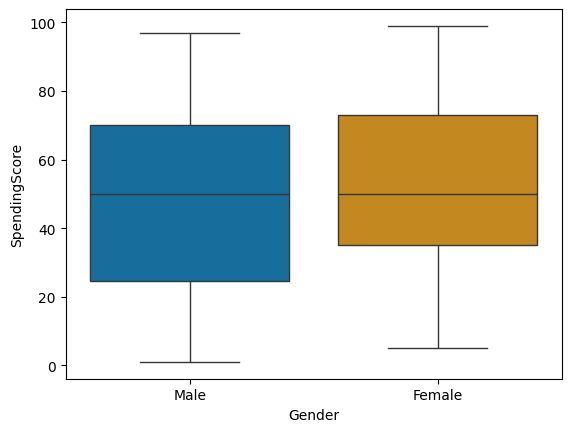

In [284]:
plot = sns.boxplot(data=df, x= "Gender", y ="SpendingScore",palette="colorblind")

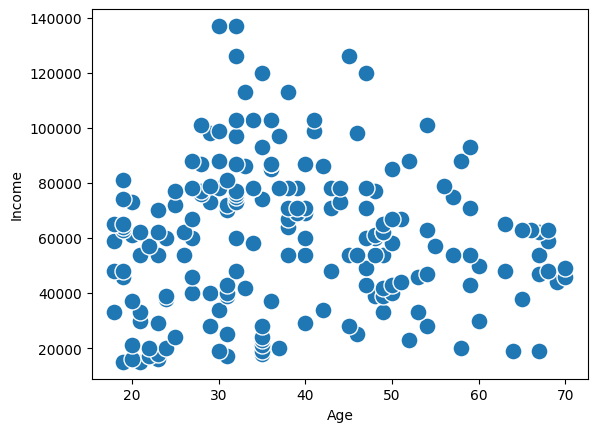

In [285]:
plot = sns.scatterplot(data=df, x= "Age", y ="Income", s=150)

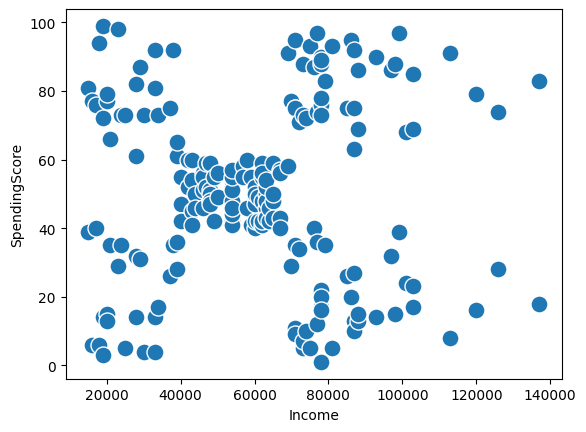

In [286]:
plot = sns.scatterplot(data=df, x= "Income", y ="SpendingScore", s=150)

In [287]:
df[["SpendingScore", "Income"]].describe().round(2)

,SpendingScore,Income
count,200.00,200.00
mean,50.20,60560.00
std,25.82,26264.72
min,1.00,15000.00
25%,34.75,41500.00
50%,50.00,61500.00
75%,73.00,78000.00
max,99.00,137000.00


In [288]:
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()

In [289]:
df_stand = scaler.fit_transform(df[["SpendingScore", "Income"]])

In [290]:
df_stand=pd.DataFrame(df_stand, columns=["SpendingScore", "Income"])
df_stand.describe().round(2)

,SpendingScore,Income
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.91,-1.74
25%,-0.60,-0.73
50%,-0.01,0.04
75%,0.89,0.67
max,1.89,2.92


In [291]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_stand[['SpendingScore','Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [292]:
df_stand['cluster']=y_predicted
df_stand.head()

,SpendingScore,Income,cluster
0,-0.434801,-1.738999,1
1,1.195704,-1.738999,1
2,-1.715913,-1.700830,1
3,1.040418,-1.700830,1
4,-0.395980,-1.662660,1


In [293]:
pd.Series(km.labels_).value_counts().sort_index()

0     38
1    123
2     39
Name: count, dtype: int64

In [294]:
b=km.cluster_centers_
b

array([[-1.22553537,  1.00919971],
       [-0.01439238, -0.62618966],
       [ 1.23950275,  0.99158305]])

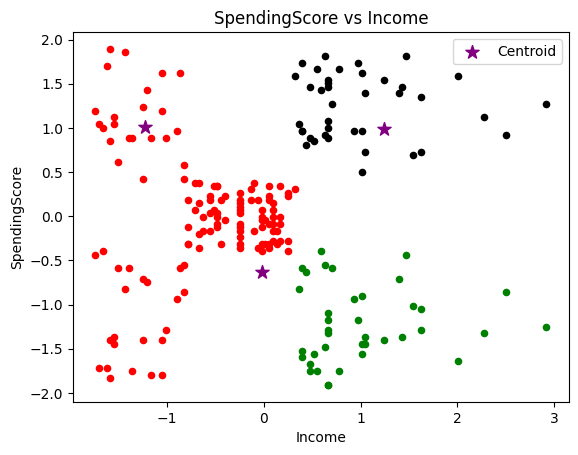

In [295]:
# Segmenting the DataFrame based on cluster labels
df1 = df_stand[df_stand.cluster == 0]
df2 = df_stand[df_stand.cluster == 1]
df3 = df_stand[df_stand.cluster == 2]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each cluster on the same axis
df1.plot(kind="scatter", y="SpendingScore", x="Income", color='green', ax=ax)
df2.plot(kind="scatter", y="SpendingScore", x="Income", color='red',  ax=ax)
df3.plot(kind="scatter", y="SpendingScore", x="Income", color='black', ax=ax)

# Scatter plot for cluster centroids
ax.scatter(b[:, 0], b[:, 1], color='purple', marker='*', s=100, label='Centroid')

# Adding labels and title
plt.title('SpendingScore vs Income')
plt.legend()

### The Within Cluster Sum of Squares (WCSS)

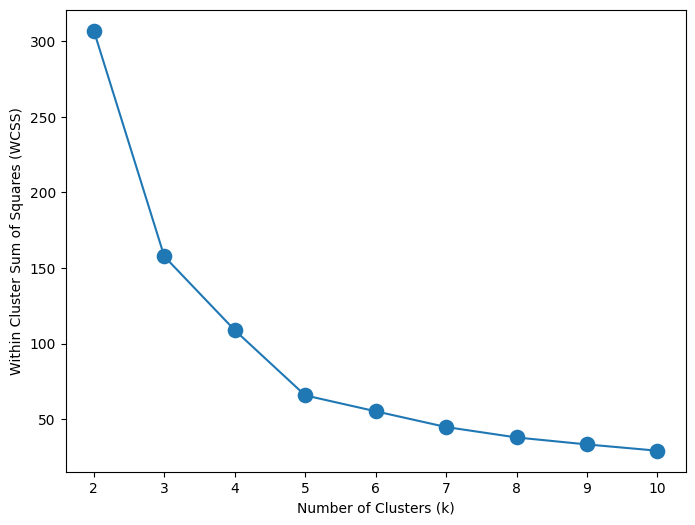

In [296]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_stand)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

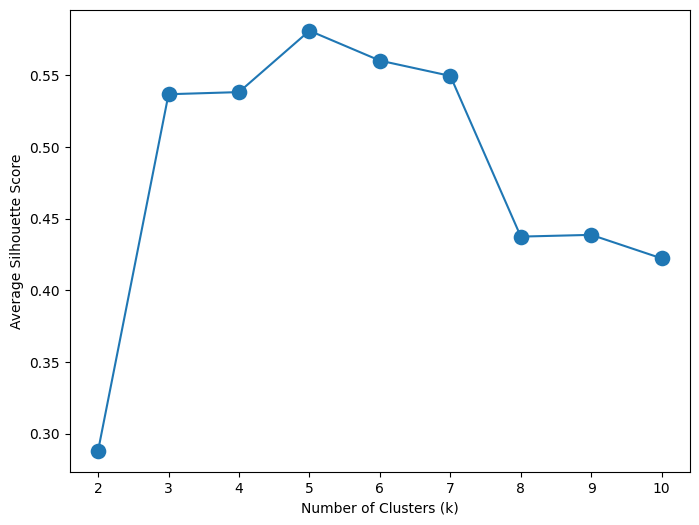

In [297]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_stad)
    silhouette.append(silhouette_score(df_stand, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

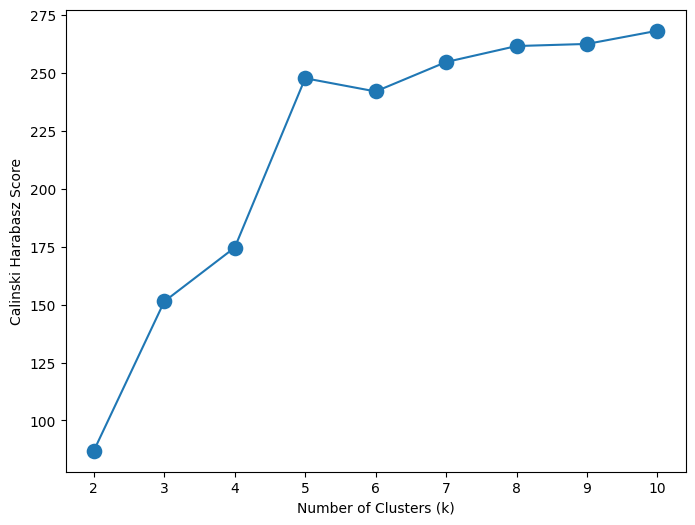

In [298]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_stand)
    calinski.append(calinski_harabasz_score(df_stad, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Calinski Harabasz Score')

## 6. Analyze and Interpret the Clusters

In [299]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=5)
y_predict = km.fit_predict(df_stand[['SpendingScore','Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [300]:
df_stand["new_cluster"]=y_predict
df_stand

,SpendingScore,Income,cluster,new_cluster
0,-0.434801,-1.738999,1,2
1,1.195704,-1.738999,1,3
2,-1.715913,-1.700830,1,2
3,1.040418,-1.700830,1,3
4,-0.395980,-1.662660,1,2
...,...,...,...,...
195,1.118061,2.268791,2,1
196,-0.861839,2.497807,0,4
197,0.923953,2.497807,2,1
198,-1.250054,2.917671,0,4


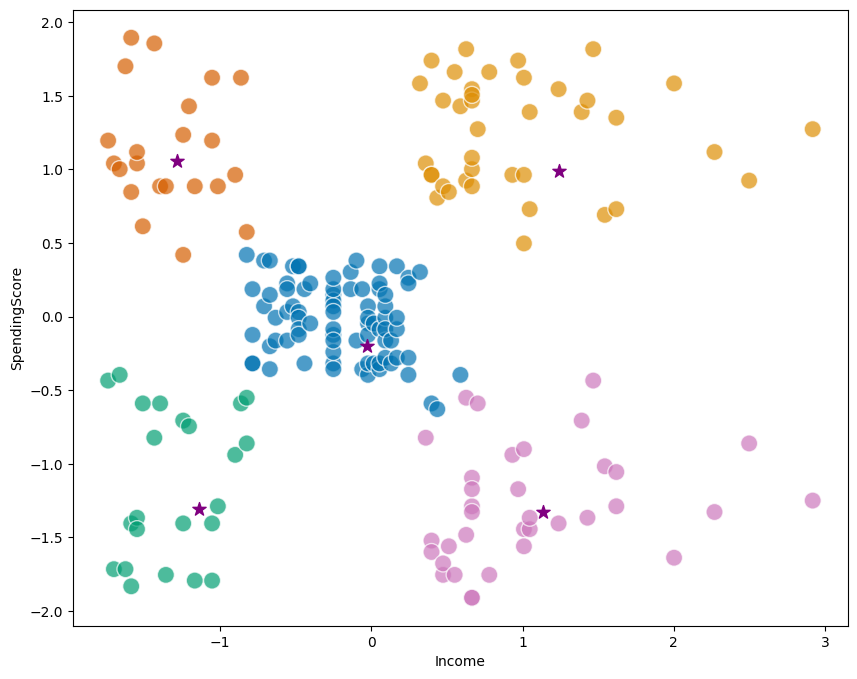

In [301]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = df_stand,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette = 'colorblind',
                     alpha = 0.7,
                     s = 150,
                     legend = False)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=100, label='Centroid')

In [302]:
df_stand.head(10)

,SpendingScore,Income,cluster,new_cluster
0,-0.434801,-1.738999,1,2
1,1.195704,-1.738999,1,3
2,-1.715913,-1.700830,1,2
3,1.040418,-1.700830,1,3
4,-0.395980,-1.662660,1,2
5,1.001596,-1.662660,1,3
6,-1.715913,-1.624491,1,2
7,1.700384,-1.624491,1,3
8,-1.832378,-1.586321,1,2
9,0.846310,-1.586321,1,3


In [303]:
#Dummy code for catergorical features
df1=pd.read_csv("/content/sample_data/mallcustomers.csv")
df1

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
...,...,...,...,...,...
195,196,Female,35,120000,79
196,197,Female,45,126000,28
197,198,Male,32,126000,74
198,199,Male,32,137000,18


In [304]:
df_stand["Gender"] = df1["Gender"]
df_stand["Age"] = df1["Age"]

In [305]:
df_stand
df_stand=pd.get_dummies(df_stand,columns=["Gender"])
df_stand.head(10)

,SpendingScore,Income,cluster,new_cluster,Age,Gender_Female,Gender_Male
0,-0.434801,-1.738999,1,2,19,False,True
1,1.195704,-1.738999,1,3,21,False,True
2,-1.715913,-1.700830,1,2,20,True,False
3,1.040418,-1.700830,1,3,23,True,False
4,-0.395980,-1.662660,1,2,31,True,False
5,1.001596,-1.662660,1,3,22,True,False
6,-1.715913,-1.624491,1,2,35,True,False
7,1.700384,-1.624491,1,3,23,True,False
8,-1.832378,-1.586321,1,2,64,False,True
9,0.846310,-1.586321,1,3,30,True,False


In [306]:
df_stand.agg({"Gender_Female": "mean",
    "Gender_Male": "mean",
    "Age": "median",
    "Income": "median",
    "SpendingScore": "median"}).round(2)

Gender_Female     0.56
Gender_Male       0.44
Age              36.00
Income            0.04
SpendingScore    -0.01
dtype: float64

In [307]:
df_stand.groupby("new_cluster").agg({"Gender_Female": 'mean',
              "Gender_Male": 'mean',
              "Age":'median',
              "Income":'median',
              "SpendingScore":'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
new_cluster,,,,,
0,0.59,0.41,46.0,-0.25,-0.01
1,0.54,0.46,32.0,0.70,1.27
2,0.61,0.39,46.0,-1.36,-1.29
3,0.59,0.41,23.5,-1.38,1.04
4,0.46,0.54,42.0,0.93,-1.33
